# Introduction to `Scikit-learn`

Signification des émoticones :
- 🌞 : documentations importantes
- 👀 : documentations intéressantes à connaître
- 🌚 : en complément
- (vide) : à vous de voir

-------

🌞 To introduce this notebook, you can watch this great video of Machine learnia : https://www.youtube.com/watch?v=P6kSc3qVph0 

👀 And the book linked, from p22 to p35 : https://d1yei2z3i6k35z.cloudfront.net/7374680/66c8a6b7a7f2c_ApprendreleMachineLearningenUneSemaine.pdf?sc=283791024268389748010232f86a5a2297b433793

-------

The `scikit-learn` package is an open-source library that provides a robust set of machine learning algorithms for Python. It is built upon the core Python scientific stack (*i.e.* NumPy, SciPy, Cython), and has a simple, consistent API, making it useful for a wide range of statistical learning applications.

<img src="http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png" width="800px"/>

## What is Machine Learning?

Machine Learning (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

**Supervised learning**
: Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and support vector machines.

**Unsupervised learning**
: Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

**Reinforcement learning**
: Algorithms that learn via reinforcement from a *critic* that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this course.

## Representing Data in `scikit-learn`

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

## Example: Iris morphometrics data

One of the datasets included with `scikit-learn` is a set of measurements for flowers, each being a member of one of three species: *Iris Setosa*, *Iris Versicolor* or *Iris Virginica*. 

<img src="http://d.pr/i/1dfvU+" width="400px"/>

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

The `load_iris` function returns the components of the iris dataset in a Python dictionary. We can see the labels for the various components by examining the dict `keys`.

In [19]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The features (variables) of the iris data consist of:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

In [20]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [21]:
n_samples, n_features = iris.data.shape
n_samples, n_features

(150, 4)

In [22]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

Types of problems know as *classification problems* try to predict to which group and example belongs. The iris data set is a suitable example of a supervised classification problem, as there are class labels for each example in the data.

The information about the class of each sample is stored in the ``target`` attribute of the dataset. They inlude the following species:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
 

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

These are encoded as `0,1,2`, respectively, in the dataset.

In [24]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [26]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names).assign(species=iris.target_names[iris.target])

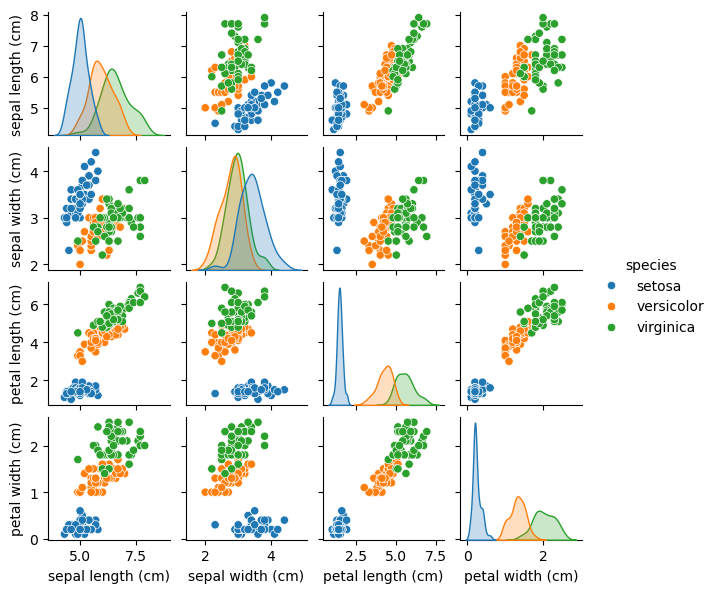

In [27]:
%matplotlib inline
import seaborn as sns

sns.pairplot(iris_df, hue='species', height=1.5);

## `scikit-learn` interface

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: 

* **estimator** interface for building and ﬁtting models
* **predictor** interface for making predictions
* **transformer** interface for converting data.

The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (*e.g.*, for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

Scikit-learn strives to have a uniform interface across all methods. For example, a typical **estimator** follows this template:

In [28]:
class Estimator(object):
  
    def fit(self, X, y=None):
        """Fit model to data X (and y)"""
        self.some_attribute = self.some_fitting_method(X, y)
        return self
            
    def predict(self, X_test):
        """Make prediction based on passed features"""
        pred = self.make_prediction(X_test)
        return pred

For a given scikit-learn **estimator** object named `model`, several methods are available. Irrespective of the type of **estimator**, there will be a `fit` method:

- `model.fit` : fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`). For unsupervised learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

> During the fitting process, the state of the **estimator** is stored in attributes of the estimator instance named with a trailing underscore character (\_). For example, the sequence of regression trees `sklearn.tree.DecisionTreeRegressor` is stored in `estimators_` attribute.

The **predictor** interface extends the notion of an estimator by adding a `predict` method that takes an array `X_test` and produces predictions based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

**supervised estimators** are expected to have the following methods:

- `model.predict` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
- `model.predict_proba` : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
- `model.score` : for classification or regression problems, most (all?) estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.

Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a **transformer** interface which deﬁnes a `transform` method. It takes as input some new data `X_test` and yields as output a transformed version. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

**unsupervised estimators** will always have these methods:

- `model.transform` : given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
- `model.fit_transform` : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Example: Logistic Regression Analysis

To demonstrate how `scikit-learn` and it's interface is used, let's conduct a logistic regression analysis on a dataset for very low birth weight (VLBW) infants. Logistic regression is a type of analysis that can be used to predict labels or classes (rather than a continuous variable, like when we use normal *linear regression*).

Data on 671 infants with very low (less than 1600 grams) birth weight from 1981-87 were collected at Duke University Medical Center by [OShea *et al.* (1992)](http://www.ncbi.nlm.nih.gov/pubmed/1635885). Of interest is the relationship between the outcome **intra-ventricular hemorrhage** and the predictors birth weight, gestational age, presence of pneumothorax, mode of delivery, single vs. multiple birth, and whether the birth occurred at Duke or at another hospital with later transfer to Duke. A secular trend in the outcome is also of interest.

https://biostat.app.vumc.org/wiki/pub/Main/DataSets/Cvlbw.html

In [29]:
import pandas as pd

vlbw = pd.read_csv("./data/vlbw.csv", index_col=0)

subset = vlbw[['ivh', 'gest', 'bwt', 'delivery', 'inout', 
               'pltct', 'lowph', 'pneumo', 'twn', 'apg1']].dropna()

# Extract response variable
y = subset.ivh.replace({'absent':0, 'possible':1, 'definite':1}) # 0 no ivh issue, 1 possible or definite issue

# Standardize some variables
X = subset[['gest', 'bwt', 'pltct', 'lowph']]
X0 = (X - X.mean(axis=0)) / X.std(axis=0)

# Recode some variables
X0['csection'] = subset.delivery.replace({'vaginal':0, 'abdominal':1})
X0['transported'] = subset.inout.replace({'born at Duke':0, 'transported':1})
X0[['pneumo', 'twn', 'apg1']] = subset[['pneumo', 'twn','apg1']]
X0.head()

,gest,bwt,pltct,lowph,csection,transported,pneumo,twn,apg1
5,-0.381853,-0.640950,-1.756012,-1.669742,1,0,1.0,0.0,5.0
13,-0.381853,0.092756,-0.174208,-0.114757,0,0,1.0,0.0,6.0
14,-0.381853,0.370375,2.037845,1.662393,1,0,0.0,0.0,6.0
16,-1.236762,-1.255677,0.727914,0.329542,0,0,0.0,0.0,4.0
17,1.755419,1.599828,-0.124777,-0.484986,1,0,0.0,0.0,8.0


In [30]:
vlbw.columns

Index(['birth', 'exit', 'hospstay', 'lowph', 'pltct', 'race', 'bwt', 'gest',
       'inout', 'twn', 'lol', 'magsulf', 'meth', 'toc', 'delivery', 'apg1',
       'vent', 'pneumo', 'pda', 'cld', 'pvh', 'ivh', 'ipe', 'year', 'sex',
       'dead'],
      dtype='object')

In [31]:
classes = y.unique()

We split the data into a training set and a testing set. By default, 25% of the data is reserved for testing. This is the first of multiple ways that we will see to do this.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X0, y)

In [33]:
print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)

Shape X_train: (348, 9)
Shape X_test: (116, 9)


The `LogisticRegression` model in scikit-learn employs a regularization coefficient `C`, which defaults to 1. The amount of regularization is lower with larger values of C.

Regularization penalizes the values of regression coefficients, while smaller ones let the coefficients range widely. Scikit-learn includes two penalties: a **l2** penalty which penalizes the sum of the squares of the coefficients (the default), and a **l1** penalty which penalizes the sum of the absolute values.

Why do regularization:
* The objectif is to prevent the algorithm from overfitting.
* Regularization is any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error. (Ian Goodfellow)
* Estimated coefficients are shrunken towards zero. This shrinkage has the effect of reducing variance, thus generalizing better on unseen data. (ISL page 204)

However, when the shrinkage or regularization paramters are chosen to large, the model starts loosing some properties (i.e. some coefficients might be shrunken to much) which can lead to a biased model. The parameters needs thus be chosen carefully.

Further reading
* 👀 https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a 
* 🌚 https://www.knime.com/blog/regularization-for-logistic-regression-l1-l2-gauss-or-laplace

In [34]:
from sklearn.linear_model import LogisticRegression

lrmod = LogisticRegression(C=1000)
lrmod.fit(X_train, y_train)

pred_train = lrmod.predict(X_train)
pred_test = lrmod.predict(X_test)

A confusion matrix is used to evaluate the performance of a classification algorithm. In this context positive is to be interpreted as : possible or definite ivh (class 1).

<img src='./images/confusion-matrix.png' width=600px>

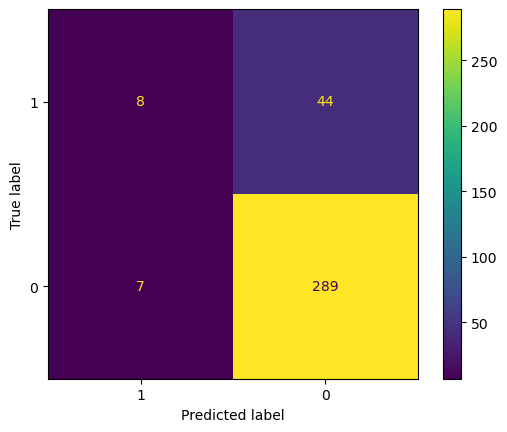

In [35]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, pred_train, labels=classes)
_ = disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [36]:
288/329

0.8753799392097265

288 of 329 births are predicted class 0: absent IVH. This is 88%. At first site we might conclude that the model performs fairly well. However, we're interested in how well the model is in predicting class 1, possible or definite IVH. Now suddenly the model performs less weel.

In [37]:
# Precision = TP / (TP + FP)
precision = 13/(6+13)
print('Precision train set:', round(precision, 2)*100, '%')

Precision train set: 68.0 %


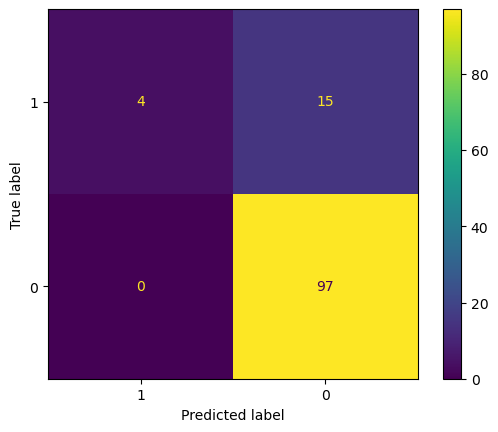

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test, labels=classes)
_ = disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [39]:
95/109

0.8715596330275229

In [40]:
# Precision of model on previsouly unseen data

precision = 3 /7
print('precision test set:', round(precision, 2)*100, '%')

precision test set: 43.0 %


For the test set the data is even worse

We can bootstrap some confidence intervals:

In [41]:
import numpy as np

n = 1000
boot_samples = np.empty((n, len(lrmod.coef_[0])))

for i in np.arange(n):
    boot_ind = np.random.randint(0, len(X0), len(X0))
    y_i, X_i = y.values[boot_ind], X0.values[boot_ind]
    
    lrmod_i = LogisticRegression(C=1000)
    lrmod_i.fit(X_i, y_i)

    boot_samples[i] = lrmod_i.coef_[0]

In [42]:
boot_samples.sort(axis=0)

In [43]:
boot_se = boot_samples[[25, 975], :].T

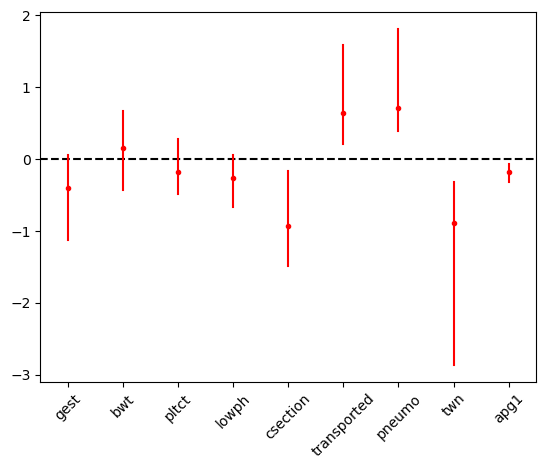

In [44]:
import matplotlib.pylab as plt

coefs = lrmod.coef_[0]
plt.plot(coefs, 'r.')
for i in range(len(coefs)):
    plt.errorbar(x=[i,i], y=boot_se[i], color='red')
plt.xlim(-0.5, 8.5)
plt.xticks(range(len(coefs)), X0.columns.values, rotation=45)
plt.axhline(0, color='k', linestyle='--')

## References

* 👀 [`scikit-learn` user's guide](http://scikit-learn.org/stable/user_guide.html)